**Дана система из пяти равнонадёжных последовательно соединённых элементов с из-
вестной вероятностью безотказной работы P. Определить вероятность безотказной работы
системы:**

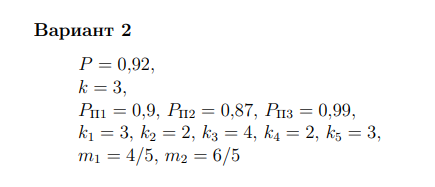

**Всюду резервированные и резервируемые элементы равнонадёжны. Также определить
выигрыш надёжности и сделать выводы.**

**1.без резервирования;**

Система работает, только если работает каждый элемент:
P_сист ​= P^5.

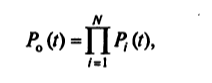

In [12]:
P = 0.92

rel_without_reserve = P ** 5
print(f"Вероятность без резерва = {rel_without_reserve}")

Вероятность без резерва = 0.6590815232000001


**2.при общем резервировании с постоянно включенным резерве кратностью k;**

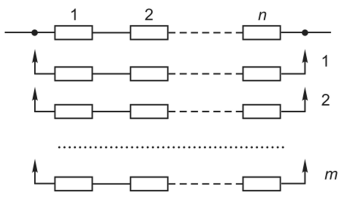

P_s ​= 1−(1−P)^n

In [13]:
k = 3
n = k + 1
hot_standby_P = 1 - (1 - rel_without_reserve) ** n

print(f"Вероятность с общим постоянным резервированием, кратным 3 = {hot_standby_P}")
print(
    f"Выигрыш надежности, как отношение с общим постоянным резервированием / без резерва = {hot_standby_P / rel_without_reserve}"
)

Вероятность с общим постоянным резервированием, кратным 3 = 0.9864916545762304
Выигрыш надежности, как отношение с общим постоянным резервированием / без резерва = 1.4967672736243234


**3.при общем резервировании с замещением кратностью k, если известны вероятности
работы переключателей Pпj, j = 1, 2, . . . , k;**

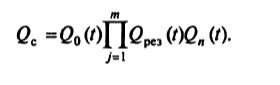

1 - Q_c



In [14]:
import numpy as np
switches_Ps = np.array([0.9, 0.87, 0.99])

cold_standby_P = 1 - (1 - rel_without_reserve) * np.prod(((1 - switches_Ps) * (1 - rel_without_reserve)))

print(f"Вероятность с общим замещающим резервом = {cold_standby_P}")
print(
    f"Выигрыш надежности, как отношение с общим замещающим резервом / без резерва = {cold_standby_P / rel_without_reserve}"
)

Вероятность с общим замещающим резервом = 0.999998243915095
Выигрыш надежности, как отношение с общим замещающим резервом / без резерва = 1.517260321697173


**4.при раздельном резервировании с постоянно включенным резервом кратностью ki
для i-того элемента, i = 1, 2, 3, 4, 5;**


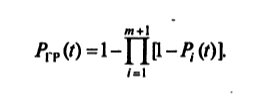

In [4]:
reserve_k_nums = np.array([3, 2, 4, 2, 3])

distr_reserv_by_each_group = 1 - ((1 - P) ** (reserve_k_nums + 1))

distr_reserve_P = np.prod(distr_reserv_by_each_group)

print(f"Вероятность с раздельным постоянным резервом = {distr_reserve_P}")
print(
    f"Выигрыш надежности, как отношение раздельным постоянным резервом / без резерва = {distr_reserve_P / rel_without_reserve}"
)

Вероятность с раздельным постоянным резервом = 0.9988911545073488
Выигрыш надежности, как отношение раздельным постоянным резервом / без резерва = 1.5155805759164522


**5.при резервировании с дробной кратностью m1, m2.**

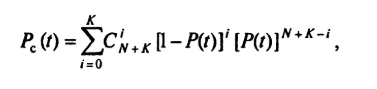

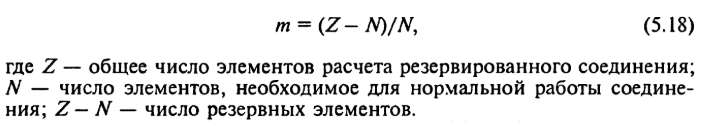

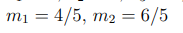

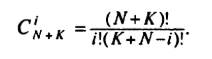

In [10]:
from scipy.special import factorial

z1 = 9
z2 = 11

k1_failed_vals = np.arange(4 + 1)
k2_failed_vals = np.arange(6 + 1)

def system_reliability_direct(K, N):
    Z_total = K + N

    failed_k_i = np.arange(K + 1)
    working_elements_i = Z_total - failed_k_i

    failure_free_work_combs = factorial(Z_total) / (
        factorial(failed_k_i) * factorial(working_elements_i)
    )

    probs = failure_free_work_combs * (P**working_elements_i) * ((1 - P) ** failed_k_i)

    return np.sum(probs)


rel1 = system_reliability_direct(4, 5)  # m1 = 4/5
rel2 = system_reliability_direct(6, 5)  # m2 = 6/5

print(rel1)
print(rel2)
# m1m2_P = rel1 * rel2

# print(f"Вероятность с раздельным постоянным резервом = {m1m2_P}")
# print(
#     f"Выигрыш надежности, как отношение раздельным постоянным резервом / без резерва = {m1m2_P / rel_without_reserve}"
# )

0.999686418146263
0.9999948202125327
